In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn.model_selection as model_selection
import sklearn.linear_model as lm
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr

In [2]:
#DEMO 5: Polynominal Regression
#Nhập dữ liệu
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
y = np.array(y) # Chuyển từ python List thành numpy array để tăng tốc tính toán

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

<AxesSubplot:>

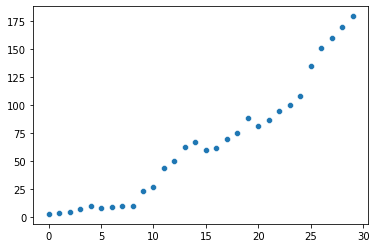

In [4]:
sns.scatterplot(x = x, y = y)

In [5]:
# Do hình dạng biểu đồ nên chọn bậc 2

In [6]:
# Chuyển đổi sang bậc cao (đa thức hóa biến x)
poly = pf(degree = 2) # Khai báo đa thức bậc 2
poly_X = poly.fit_transform(x.reshape(-1, 1)) # đa thức hóa
poly_X

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.],
       [  1.,  27., 729.],
       [  1.,  28., 784.],
       [  1.,  29., 841.]])

In [7]:
# Tạo model regression
pr_model = lr() # tạo đối tượng thuộc class LinearRegression
pr_model.fit(poly_X, y) #Fit tương đương với việc tính toán

LinearRegression()

In [8]:
# Dự đoán (predicting)

In [9]:
#Tạo giá trị dự đoán từ y
Y_pred = pr_model.predict(poly_X)
Y_pred

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

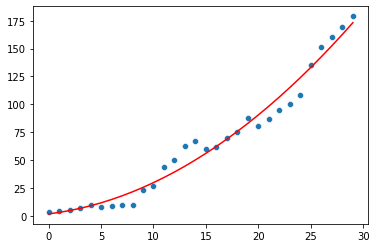

In [10]:
# Vẽ hình để so sánh
sns.scatterplot(x = x, y = y);
sns.lineplot(x = x, y = Y_pred, color = "r");

In [11]:
# Tính r2score
metrics.r2_score(y, Y_pred)

0.9742355121173141

In [12]:
# 97% là kết quả gần tuyệt đối

In [13]:
# # Giả sử bậc 3
# # Chuyển đổi sang bậc cao (đa thức hóa biến x)
# poly = pf(degree = 3) # Khai báo đa thức bậc 3
# poly_X = poly.fit_transform(x.reshape(-1, 1)) # đa thức hóa
# poly_X

In [14]:
# # Tạo model regression
# pr_model = lr() # tạo đối tượng thuộc class LinearRegression
# pr_model.fit(poly_X, y) #Fit tương đương với việc tính toán

In [15]:
# #Tạo giá trị dự đoán từ y
# Y_pred = pr_model.predict(poly_X)
# Y_pred

In [16]:
# # Vẽ hình để so sánh
# sns.scatterplot(x = x, y = y);
# sns.lineplot(x = x, y = Y_pred, color = "r");

In [17]:
# # Tính r2score
# metrics.r2_score(y, Y_pred)

In [18]:
# Chuyển sang bậc 3 thì kết quả là 97,6%, không lệch nhiều so với bậc 2 là 97.4%
# Nếu 2 kết quả r2_score không lệch nhiều thì nên chọn phương trình bậc thấp hơn để tránh tình trạng overfitting và tốn công sức tính toán

In [20]:
# Dự đoán với x bất kỳ
x1 = 30
X1 = np.array(x1) # Chuyển thành dạng numpy array
polyX1 = poly.fit_transform(X1.reshape(-1, 1)) # đa thức hóa
y1 = pr_model.predict(polyX1) #Quá trình dự đoán
print(y1)


[184.06699507]


In [21]:
# SỬ DỤNG PIPELINE

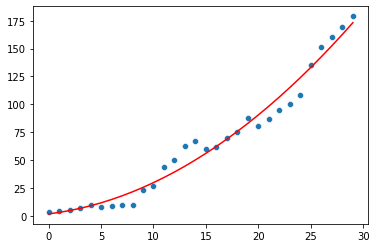

In [24]:
# Pipeline là 1 quy trình, tương tự như user function, dùng để quy định 1 quy trình....
from sklearn.pipeline import Pipeline


#Chuyển đổi sang bậc cao
poly = pf(degree = 2)

# Tạo model regression
pr_model = lr()

# Tạo pipeline
pipeline = Pipeline(
    [
        ("polynomial_features", poly),
        ("linear_regression", pr_model)
    ]
)

# Tính pipeline
pipeline.fit(x.reshape(-1, 1), y)

# Tạo giá trị y dự đoán
Y_pred = pipeline.predict(x.reshape(-1, 1))

# Vẽ hình
sns.scatterplot(x = x, y = y)
sns.lineplot(x = x, y = Y_pred, color = "r")
plt.show()

In [25]:
x2 = 30
y2 = pipelinex2 = 30
y2 = pipeline.predict(np.array(x2).reshape(-1, 1))
y2


array([184.06699507])

In [26]:
#HỒI QUY ĐA BIẾN

In [27]:
area = [2100,1416,1534,852,1600,1985,1535,1050,2300,1200]
bedroom = [5,3,3,2,3,5,4,2,4,3]
floor = [1,2,2,1,2,1,2,1,2,2]
price = [460,232,315,178,329,420,330,195,450,250]

In [28]:
Y = np.asarray(price) #Xử lý Y --> numpy array
#Xử lý X
X = np.append(np.array(area).reshape(-1, 1), np.array(bedroom).reshape(-1, 1), axis=1)
X = np.append(X, np.array(floor).reshape(-1, 1), axis=1)
X

array([[2100,    5,    1],
       [1416,    3,    2],
       [1534,    3,    2],
       [ 852,    2,    1],
       [1600,    3,    2],
       [1985,    5,    1],
       [1535,    4,    2],
       [1050,    2,    1],
       [2300,    4,    2],
       [1200,    3,    2]])

In [29]:
demo6_model = lr(normalize = True) # Tạo object hồi quy tuyến tính, có chuẩn hóa
demo6_model.fit(X, Y) # Tính toán model

C:\Users\Hung\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [30]:
# Sử dụng pipeline để tạo ra model chuẩn
from sklearn.preprocessing import StandardScaler 

In [32]:
zscore = StandardScaler(with_mean = False)
demo6_model = lr()

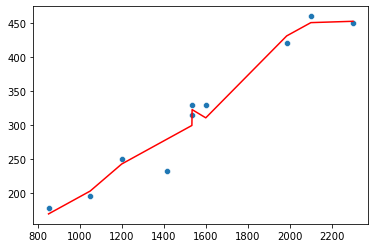

In [38]:
# Tạo pipeline
pipeline = Pipeline(
    [
        ("StandardScaler", zscore),
        ("linear_regression", demo6_model)
    ]
)
pipeline.fit(X, Y)
Y_ = pipeline.predict(X)

#Vẽ
sns.scatterplot(x = X[:,0], y = Y);
sns.lineplot(x = X[:,0], y = Y_, color = "r");

In [40]:
# kiểm tra model có chính xác hay không
from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_)
r2

0.9653877508338672

In [41]:
# Bài tập dữ liệu Insurance

In [42]:
import pandas as pd
dat7 = pd.read_csv("insurance.csv")
dat7

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
# Vẽ biểu đồ trực quan hóa mối quan hệ giữa tuổi với chi phí y tế, bmi với chi phí

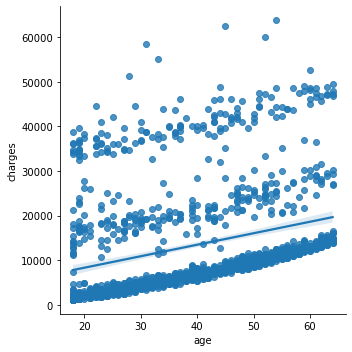

In [45]:
import seaborn as sns
sns.lmplot(data = dat7, x = "age", y = "charges");

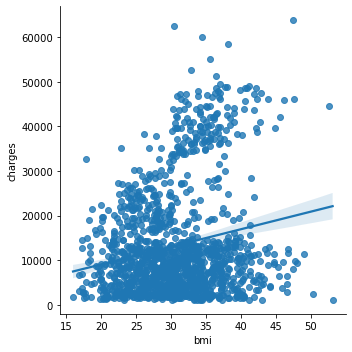

In [46]:
sns.lmplot(data = dat7, x = "bmi", y = "charges");

In [47]:
# Chuyển các biến có kiểu categorical: giới tính, hút thuốc, khu vực thành các biến "Dummy": sex_female, sex_male, smoker_no, smoker_yes, region_.... 
# Sau đó loại bớt 2 trường không cần thiết sex_male và smoker_no bằng hàm drop() 

In [49]:
dat71 = pd.get_dummies(dat7)
dat71

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [50]:
dat71 = dat71.drop(columns = ['sex_male', 'smoker_no'])
dat71


,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


In [51]:
# Chia dữ liệu quan sát đc thành 2 phần để học và kiểm tra

In [53]:
import sklearn.model_selection as model_selection

train, test = model_selection.train_test_split(dat71, train_size = 0.6)
train

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
932,46,25.800,5,10096.97000,0,0,0,0,0,1
74,44,27.400,2,7726.85400,0,0,0,0,0,1
891,36,29.040,4,7243.81360,1,0,0,0,1,0
1329,52,38.600,2,10325.20600,0,0,0,0,0,1
318,44,27.645,0,7421.19455,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
534,64,40.480,0,13831.11520,0,0,0,0,1,0
736,37,38.390,0,40419.01910,1,1,0,0,1,0
911,18,31.730,0,33732.68670,0,1,1,0,0,0
1221,40,24.970,2,6593.50830,0,0,0,0,1,0


In [54]:
test

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
207,35,27.740,2,20984.09360,0,1,1,0,0,0
1288,20,39.400,2,38344.56600,0,1,0,0,0,1
761,23,35.200,1,2416.95500,0,0,0,0,0,1
400,51,20.600,0,9264.79700,1,0,0,0,0,1
240,23,36.670,2,38511.62830,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1008,25,24.985,2,23241.47453,0,0,1,0,0,0
1087,57,31.540,0,11353.22760,0,0,0,1,0,0
25,59,27.720,3,14001.13380,1,0,0,0,1,0
1058,24,39.490,0,2480.97910,1,0,0,0,1,0


In [55]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình

In [56]:
X = train.drop(columns=["charges"])
Y = train.loc[:,"charges"]
X

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
932,46,25.800,5,0,0,0,0,0,1
74,44,27.400,2,0,0,0,0,0,1
891,36,29.040,4,1,0,0,0,1,0
1329,52,38.600,2,0,0,0,0,0,1
318,44,27.645,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
534,64,40.480,0,0,0,0,0,1,0
736,37,38.390,0,1,1,0,0,1,0
911,18,31.730,0,0,1,1,0,0,0
1221,40,24.970,2,0,0,0,0,1,0


In [57]:
Y

932     10096.97000
74       7726.85400
891      7243.81360
1329    10325.20600
318      7421.19455
           ...     
534     13831.11520
736     40419.01910
911     33732.68670
1221     6593.50830
1140     9048.02730
Name: charges, Length: 802, dtype: float64

In [63]:
# Sử dụng pipeline
# Tạo chuẩn hóa
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean = False)

# Tạo model Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Tạo pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    [
        ("StandardScaler", zscore),
        ("linear_regression", model)
    ]
)

pipeline.fit(X, Y)

Y_ = pipeline.predict(test.drop(columns=["charges"]))

# Tính r2score
import sklearn.metrics as metrics
metrics.r2_score(test.loc[:,"charges"], Y_)

0.7162111261524196